Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

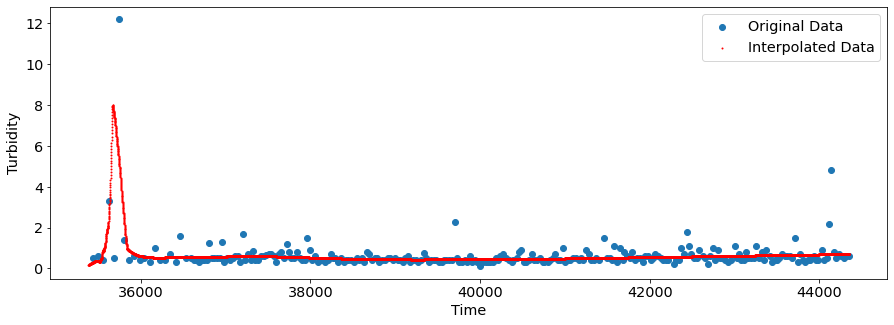

313/313 [==============================] - 0s 337us/step - loss: 7.7100e-17
['loss']


array([[0.02179074],
       [0.0280977 ],
       [0.11505076],
       [0.4455351 ],
       [0.5338671 ],
       [0.3094984 ],
       [0.0842379 ],
       [0.056753  ],
       [0.04609879],
       [0.04071152],
       [0.0385318 ],
       [0.03642429],
       [0.03512631],
       [0.03587253],
       [0.03664405],
       [0.03741557],
       [0.03818709],
       [0.03797697],
       [0.03763239],
       [0.03448736],
       [0.03893206]], dtype=float32)

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB39A_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB39A.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 12.2
time_min = 35438.00                   
time_max = 44356.47                             

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

interpolation = model.predict([0.003363805
,0.009979288
,0.016819024
,0.023658761
,0.030498497
,0.037338234
,0.044290097
,0.05090558
,0.057745316
,0.064585053
,0.071424789
,0.078264526
,0.085216389
,0.091831872
,0.098671609
,0.105511345
,0.112351082
,0.119190818
,0.126142681
,0.672088206
,0.764256459
])
interpolation